# Clustering

## Problem 1: Segment Customers

The problem that we are going to solve in this assignment is to segment customers into different groups based on their shopping trends.

In [2]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load data

Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [3]:
# load the data
shopping_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/shopping_data.csv')
shopping_data.rename(
    columns={
        'CustomerID': 'customer_id',
        'Genre': 'genre',
        'Age': 'age',
        'Annual Income (k$)': 'annual_income',
        'Spending Score (1-100)': 'spending_score'
    },
    inplace=True
)
display(shopping_data.head())

# TODO: retain only anual_income and spending_score for clustering

shopping_data = shopping_data[['annual_income','spending_score']]

,customer_id,genre,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
display(shopping_data.head())

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Hierarchical Clustering
First, we will apply hierarchical clustering and use dendrogram to help find the number of clusters within the data.

**TODO: Use dendrogram to plot hierarchical clustering and find the number of clusters that makes sense.**

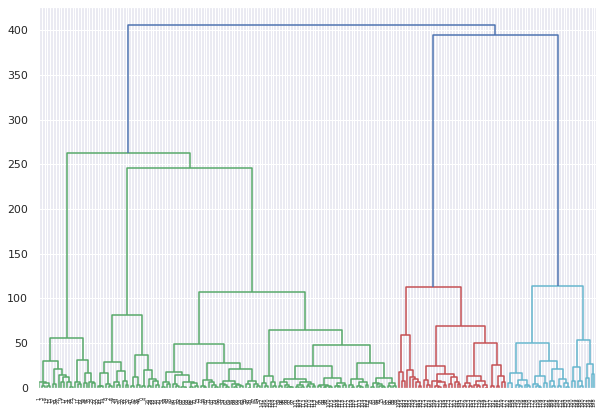

In [5]:
# TODO
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(shopping_data, method='ward'))  

**TODO: Apply hierarchical clustering based on the number of clusters you pick from the dendrogram, and visualize the results using scatterplot.**

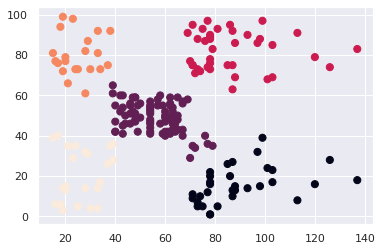

In [6]:
# TODO
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_ward = hc.fit_predict(shopping_data)  

plt.scatter(shopping_data['annual_income'], shopping_data['spending_score'], c=y_ward, s=50)

### K-means Clustering
Then, we will apply k-means to the same data and visualize the results.

**TODO: Vary the number of K from 2 to 10 and plot the Sum of Squared Error (SSE) as K increases and pick up the value of K that makes sense.**

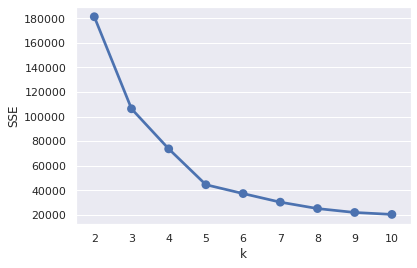

In [7]:
# TODO
from sklearn.cluster import KMeans

sse = {}
for k in range(2, 11):    
  kmeans = KMeans(n_clusters=k, random_state=1)    
  kmeans.fit(shopping_data)    
  sse[k] = kmeans.inertia_ 

# Plot SSE for each k
plt.xlabel('k'); 
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

**TODO: Cluster the data using K-means based on the pre-defined value of K from the previous step and and visualize the results using scatterplot.**

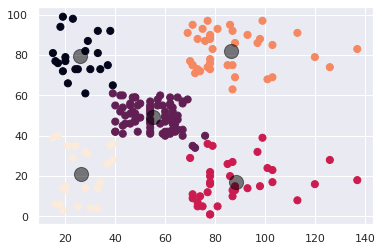

In [8]:
# TODO
kmeans = KMeans(n_clusters=5)
kmeans.fit(shopping_data)
y_kmeans = kmeans.predict(shopping_data)

plt.scatter(shopping_data['annual_income'], shopping_data['spending_score'], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Problem 2: Clustering (Manually)

For the following dataset, perform the clustering “by hand”:

17 28 50 60 80 89 150 167 171 189 
1. 	Use the K-means algorithm with K= 3 to cluster the data
2. 	Use hierarchical agglomerative clustering with single linkage to cluster the data
3. 	Use hierarchical agglomerative clustering with complete linkage to cluster the data
4. 	For K-means What will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189

### Use the K-means algorithm with K= 3 to cluster the data

1. Intial centers: 20, 70, 170
2. Mean of initial clusters: 

In [20]:
print(np.array([17,28]).mean())
print(np.array([50, 60, 80, 89]).mean())
print(np.array([150, 167, 171, 189]).mean())

22.5
69.75
169.25


The nearest centers remain the same, so the clustering is complete.

### Use hierarchical agglomerative clustering with single linkage to cluster the data

1. First (bottom) clusters are individual clusters: 

> 17, 28, 50, 60, 80, 89, 150, 167, 171, 189

2. Merge 2 closest clusters: 

> [17, 28], [50, 60], [80, 89], [150, 167], [171, 189]

3. Merge clusters with shortest minumum distance until converged into one cluster: 

> [17, 28], [50, 60, 80, 89], [150, 167, 171, 189]

> [17, 28, 50, 60, 80, 89], [150, 167, 171, 189]

> [17, 28, 50, 60, 80, 89, 150, 167, 171, 189]

### Use hierarchical agglomerative clustering with complete linkage to cluster the data

1. First (bottom) clusters are individual clusters: 

> 17, 28, 50, 60, 80, 89, 150, 167, 171, 189

2. Merge 2 closest clusters: 

> [17, 28], [50, 60], [80, 89], [150, 167], [171, 189]

3. Merge clusters with shortest maximum distance until converged into one cluster: 

> [17, 28, 50, 60], [80, 89], [150, 167, 171, 189]

> [17, 28, 50, 60, 80, 89], [150, 167, 171, 189]

> [17, 28, 50, 60, 80, 89, 150, 167, 171, 189]


### What will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189

1. Mean of inital clusters:

In [21]:
print(np.array([17, 28, 50, 60, 80, 89, 150]).mean())
print(np.array([167, 171]).mean())
print(np.array([189]).mean())

67.71428571428571
169.0
189.0


2. Mean of second iteration clusters:

In [22]:
print(np.array([17, 28, 50, 60, 80, 89]).mean())
print(np.array([150, 167, 171]).mean())
print(np.array([189]).mean())

54.0
162.66666666666666
189.0


3. As 171 is still closer to 162 than 189, the clusters converge:


> [17, 28, 50, 60, 80, 89]

> [150, 167, 171]

> [189]






## Bonus points
Use the dataset of accepted papers at the AAAI 2014 conference to find clusters of papers using K-Means. You can use paper title or abstract to build your features using [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model).

1. Vary the number of K from 2 to 6 and show if the results vary and assess the clusters obtained.

2. Make a case regarding which clusters ‘make sense’ e.g., is there a cluster were papers on reinforcement learning are together vs. another cluster which has papers on deep learning.

In [28]:
# Load the Relevant libraries
import sklearn as sk

# URL for the AAAI (UW Repository)
aaai_data = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/AAAI2014AcceptedPapers.csv")
aaai_data.head()

,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."
